In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 4, Part 2: Census ##

In [4]:
full = Table.read_table('nc-est2014-agesex-res.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858
0,6,4066381,4066412,4073013,4074979,4097780,4143094,4134352
0,7,4030579,4030594,4043047,4083240,4084964,4108615,4154000
0,8,4046486,4046497,4025604,4053206,4093213,4095827,4119524
0,9,4148353,4148369,4125415,4035769,4063193,4104133,4106832


In [5]:
partial = full.select('SEX', 'AGE', "POPESTIMATE2010", "POPESTIMATE2014")
partial

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [6]:
simple = partial.relabeled('POPESTIMATE2010', '2010').relabeled(3, '2014')
simple

SEX,AGE,2010,2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [7]:
simple.set_format([2, 3], NumberFormatter)

SEX,AGE,2010,2014
0,0,"3,951,330","3,948,350"
0,1,"3,957,888","3,962,123"
0,2,"4,090,862","3,957,772"
0,3,"4,111,920","4,005,190"
0,4,"4,077,552","4,003,448"
0,5,"4,064,653","4,004,858"
0,6,"4,073,013","4,134,352"
0,7,"4,043,047","4,154,000"
0,8,"4,025,604","4,119,524"
0,9,"4,125,415","4,106,832"


In [8]:
simple.sort('AGE', descending=True)

SEX,AGE,2010,2014
2,999,"157,257,573","161,920,569"
1,999,"152,089,484","156,936,487"
0,999,"309,347,057","318,857,056"
2,100,"45,058","58,468"
1,100,"9,351","13,729"
0,100,"54,409","72,197"
2,99,"26,074","32,791"
1,99,"6,104","9,037"
0,99,"32,178","41,828"
2,98,"37,533","46,536"


In [9]:
no_999 = simple.where("AGE", are.below(999))

In [10]:
everyone = no_999.where('SEX', 0).drop("SEX")
males = no_999.where('SEX', 1).drop("SEX")
females = no_999.where('SEX', 2).drop("SEX")

In [11]:
females

AGE,2010,2014
0,"1,932,910","1,930,493"
1,"1,937,556","1,938,870"
2,"2,002,177","1,935,270"
3,"2,010,648","1,956,572"
4,"1,993,240","1,959,950"
5,"1,988,080","1,961,391"
6,"1,993,603","2,024,024"
7,"1,979,908","2,031,760"
8,"1,971,142","2,014,402"
9,"2,018,378","2,009,560"


In [12]:
females.sort("2014", descending=True)

AGE,2010,2014
54,"2,196,798","2,331,961"
53,"2,268,457","2,316,131"
24,"2,082,209","2,301,237"
23,"2,066,126","2,298,701"
51,"2,289,164","2,283,261"
52,"2,283,408","2,282,051"
50,"2,355,349","2,279,824"
55,"2,183,762","2,263,367"
56,"2,108,681","2,254,749"
22,"2,098,759","2,244,480"


In [13]:
males.sort("2014", descending=True)

AGE,2010,2014
23,"2,151,095","2,399,883"
24,"2,161,380","2,391,398"
22,"2,188,228","2,367,842"
21,"2,241,095","2,310,734"
25,"2,177,171","2,295,836"
20,"2,331,846","2,269,570"
54,"2,091,677","2,242,828"
26,"2,102,375","2,240,026"
19,"2,334,906","2,220,790"
53,"2,170,965","2,219,617"


In [15]:
pop_2014 = Table().with_columns(
    'Age', males.column(0),
    'Males', males.column(2),
    'Females', females.column(2)
)
pop_2014

Age,Males,Females
0,2017857,1930493
1,2023253,1938870
2,2022502,1935270
3,2048618,1956572
4,2043498,1959950
5,2043467,1961391
6,2110328,2024024
7,2122240,2031760
8,2105122,2014402
9,2097272,2009560


In [16]:
percent_females = 100 *pop_2014.column(2)/(pop_2014.column(1) + pop_2014.column(2))
counts_and_percents = pop_2014.with_column('Percent Female', percent_females)
counts_and_percents

Age,Males,Females,Percent Female
0,2017857,1930493,48.8937
1,2023253,1938870,48.9351
2,2022502,1935270,48.898
3,2048618,1956572,48.8509
4,2043498,1959950,48.9565
5,2043467,1961391,48.9753
6,2110328,2024024,48.9563
7,2122240,2031760,48.9109
8,2105122,2014402,48.8989
9,2097272,2009560,48.9321


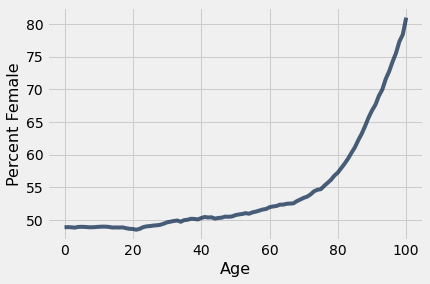

In [17]:
counts_and_percents.plot('Age', 'Percent Female')

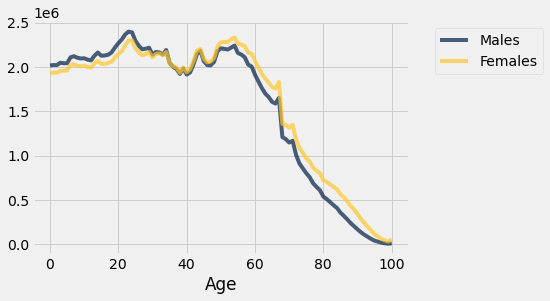

In [18]:
pop_2014.plot('Age')